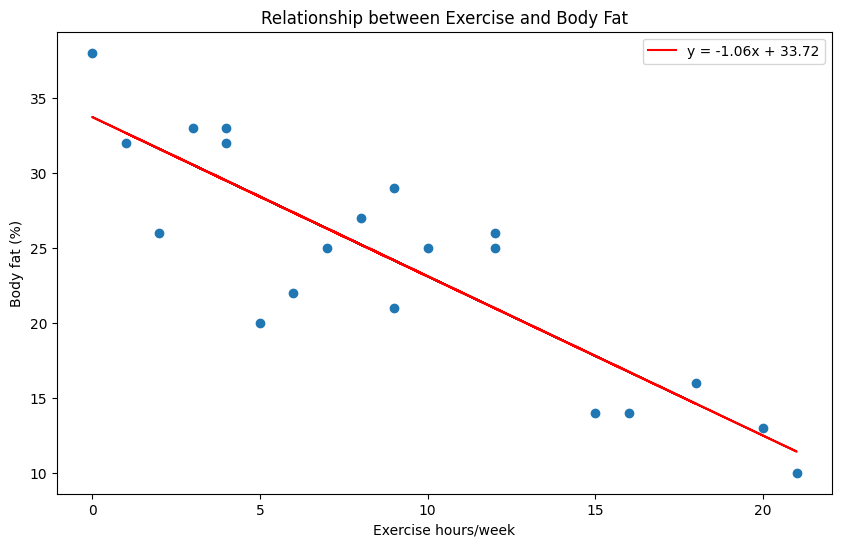

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
x = np.array([12, 4, 2, 18, 15, 12, 0, 9, 3, 6, 10, 8, 9, 4, 1, 5, 21, 20, 7, 16])
y = np.array([25, 33, 26, 16, 14, 26, 38, 21, 33, 22, 25, 27, 29, 32, 32, 20, 10, 13, 25, 14])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Add regression line
line = slope * x + intercept
plt.plot(x, line, color='r', label=f'y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('Exercise hours/week')
plt.ylabel('Body fat (%)')
plt.title('Relationship between Exercise and Body Fat')
plt.legend()

# Show plot
plt.show()

In [19]:
pip install -U scikit-learn scipy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.0
    Uninstalling matplotlib-3.9.0:
      Successfully uninstalled matplotlib-3.9.0
Note: you may need to restart the kernel to use updated packages.


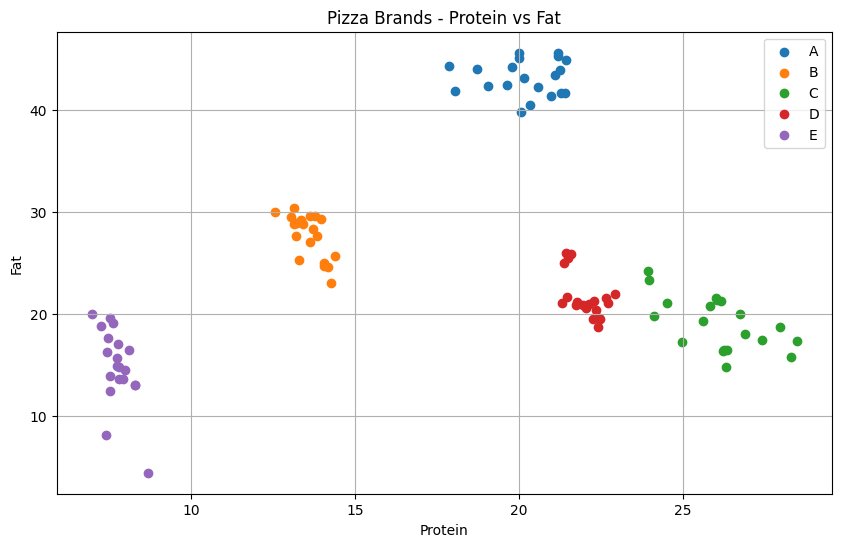

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Pizza-simp.csv')

# Extract protein (p) and fat (f) columns
X = data[['p', 'f']]
y = data['brand']

# Create scatter plot
plt.figure(figsize=(10, 6))
for brand in data['brand'].unique():
    brand_data = data[data['brand'] == brand]
    plt.scatter(brand_data['p'], brand_data['f'], label=brand)

plt.xlabel('Protein')
plt.ylabel('Fat')
plt.title('Pizza Brands - Protein vs Fat')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Encode the brand labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# New pizza data point
new_pizza = [[18.0, 25.0]]

# KNN with K=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y_encoded)
prediction_3 = knn_3.predict(new_pizza)
brand_3 = le.inverse_transform(prediction_3)[0]

print(f"Prediction for K=3: Brand {brand_3}")

# KNN with K=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X, y_encoded)
prediction_5 = knn_5.predict(new_pizza)
brand_5 = le.inverse_transform(prediction_5)[0]

print(f"Prediction for K=5: Brand {brand_5}")

Prediction for K=3: Brand D
Prediction for K=5: Brand D


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


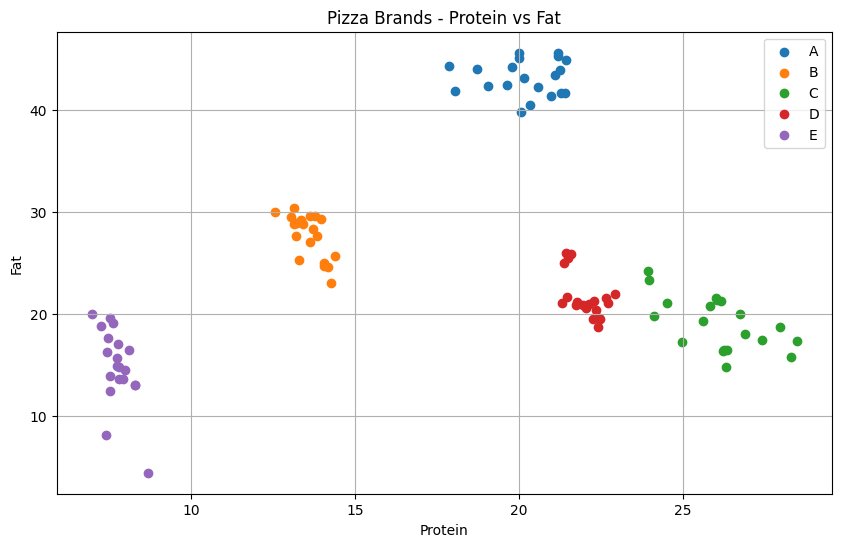

Prediction for K=3: Brand D
Prediction for K=5: Brand D


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


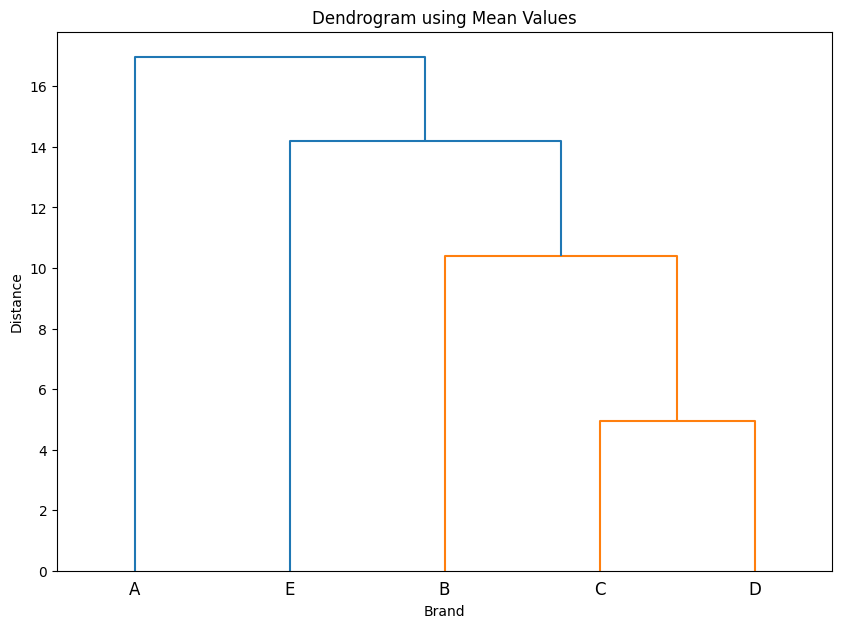

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
data = pd.read_csv('Pizza-simp.csv')

# Extract protein (p) and fat (f) columns
X = data[['p', 'f']]
y = data['brand']

# Create scatter plot
plt.figure(figsize=(10, 6))
for brand in data['brand'].unique():
    brand_data = data[data['brand'] == brand]
    plt.scatter(brand_data['p'], brand_data['f'], label=brand)

plt.xlabel('Protein')
plt.ylabel('Fat')
plt.title('Pizza Brands - Protein vs Fat')
plt.legend()
plt.grid(True)
plt.show()

# Encode the brand labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# New pizza data point
new_pizza = [[18.0, 25.0]]

# KNN with K=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y_encoded)
prediction_3 = knn_3.predict(new_pizza)
brand_3 = le.inverse_transform(prediction_3)[0]

print(f"Prediction for K=3: Brand {brand_3}")

# KNN with K=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X, y_encoded)
prediction_5 = knn_5.predict(new_pizza)
brand_5 = le.inverse_transform(prediction_5)[0]

print(f"Prediction for K=5: Brand {brand_5}")

# Calculate mean values for each brand
mean_values = data.groupby('brand').mean()

# Perform hierarchical clustering on mean values
linked = linkage(mean_values, 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=mean_values.index.tolist())
plt.title('Dendrogram using Mean Values')
plt.xlabel('Brand')
plt.ylabel('Distance')
plt.show()